In [1]:
# Additional libraries installs
%pip install missingno

In [2]:
#Import Libraries
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as pyplot
import seaborn as sns
import missingno as msno
import warnings

opt.warn_on_int_to_str_conversion = False
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
# Load Facebook Data
df = pd.read_csv('./data/Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Facebook.csv', low_memory=False)

In [4]:
# Check data dimensions
print('Rows: ', df.shape[0])
print('Columns: ', df.shape[1])

Rows:  9803
Columns:  147


In [5]:
# Examine first two observations
df.head(2)

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Linked Content,Impressions,Organic Impressions,Viral Impressions,Non-viral Impressions,Paid Impressions,Fan Impressions,Fan Organic Impressions,Fan Paid Impressions,Non-fan Impressions,Non-fan Organic Impressions,Non-fan Paid Impressions,Reach,Organic Reach,Viral Reach,Non-viral Reach,Paid Reach,Fan Reach,Fan Paid Reach,Potential Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Reactions,Likes,Dislikes,Love Reactions,Haha Reactions,Wow Reactions,Sad Reactions,Angry Reactions,Comments,Shares,Saves,Click-Through Rate,Post Link Clicks,Other Post Clicks,Post Clicks (All),Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Post Photo View Clicks,Post Video Play Clicks,Other Engagements,Answers,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Negative Feedback,bit.ly Link Clicks,Engaged Users,Engaged Fans,Users Talking About This,Unique Reactions,Unique Comments,Unique Shares,Unique Answers,Unique Post Clicks,Unique Post Link Clicks,Unique Post Photo View Clicks,Unique Post Video Play Clicks,Unique Other Post Clicks,Unique Negative Feedback,Subscribers Gained from Video,Annotation Clicks,Card Clicks,Video Views,Media Views,Organic Video Views,Paid Video Views,Partial Video Views,Organic Partial Video Views,Paid Partial Video Views,Full Video Views,Full Video View Rate,Follow Video Views,For You Video Views,Hashtag Video Views,Business Account Video Views,Sound Video Views,Unspecified Video Views,Organic Full Video Views,Paid Full Video Views,Autoplay Video Views,Click to Play Video Views,Sound on Video Views,Sound off Video Views,10-Second Video Views,Organic 10-Second Video Views,Paid 10-Second Video Views,Autoplay 10-Second Video Views,Click to Play 10-Second Video Views,Sound on 10-Second Video Views,Sound off 10-Second Video Views,Autoplay Partial Video Views,Click to Play Partial Video Views,Autoplay Full Video Views,Click to Play Full Video Views,95% Video Views,Organic 95% Video Views,Paid 95% Video Views,Video Length (Seconds),Average Video Time Watched (Seconds),Video View Time (Seconds),Organic Video View Time (Seconds),Paid Video View Time (Seconds),Unique Video Views,Unique Organic Video Views,Unique Paid Video Views,Unique 10-Second Video Views,Unique Full Video Views,Unique Organic 95% Video Views,Unique Paid 95% Video Views,Video Ad Break Ad Impressions,Video Ad Break Ad Earnings,Video Ad Break Ad Cost per Impression (CPM),YouTube Premium Views,Estimated Minutes Watched,Estimated Premium Minutes Watched,Story Taps Back,Story Taps Forward,Story Exits,Story Replies,Video Added to Playlists,Subscribers Lost from Video,Video Removed from Playlists,Annotation Impressions,Annotation Clickable Impressions,Annotation Closable Impressions,Annotation Closes,Card Impressions,Card Teaser Impressions,Card Teaser Clicks,Poll Votes,Tags
0,12/17/2022 5:08 pm,253788558082460_5441020446025886,Facebook,Post,Video,Stanbic IBTC,Damilare Oyekanmi,https://www.facebook.com/253788558082460/posts/5441020446025886/,"We celebrated recently with Novare, one of our top clients on the 6th anniversary of their Novare Lekki mall opening. \n#TrustedPartner\n#ITCANBE",https://www.facebook.com/StanbicIBTC/videos/532359832150282/,"207,378","207,378",5,"207,373",0.0,"1,147","1,147",0.0,"206,231","206,231",0.0,"207,378","207,378",4,"213,627",0.0,"1,112",0.0,NaN,0.49%,0.49%,"1,024",179,176,NaN,3.0,0.0,0.0,0.0,0.0,59,2.0,NaN,0%,NaN,784,784,NaN,NaN,NaN,NaN,NaN,52,NaN,0.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,792,51,231,177,53.0,2.0,0.0,587,NaN,NaN,50.0,577,13.0,NaN,NaN,NaN,982,NaN,982,0.0,917,917,0.0,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65,0.0,960,22.0,634,348,270,270,0.0,261,9.0,186,84,897,0.0,63,2.0,19,19,0.0,84.07,3.47,"14,824.6","14,824.6",0,975,975,0.0,263,62,19,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CIB Posts
1,5/4/2019 10:01 am,253788558082460_20018249799454

## Data Cleaning

### Drop Columns

The plan is to drop columns in which atleast 80% of the data are null values.

These columns cannot be used in the analysis

In [6]:
# Return columns where null values are >= 80%
null_columns = list(df.columns[df.isnull().sum() >= 0.8*len(df)])

In [7]:
# Get the columns that are not completely null
not_null_columns = df.columns[~df.columns.isin(null_columns)]

# Create a new dataframe with only the non-null columns
df_not_null = df[not_null_columns]

In [8]:
# Check new dataframe dimensions
print('Rows: ', df_not_null.shape[0])
print('Columns: ', df_not_null.shape[1])

Rows:  9803
Columns:  57


In [9]:
# Examine first two observations
df_not_null.head(2)

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Linked Content,Impressions,Organic Impressions,Viral Impressions,Non-viral Impressions,Paid Impressions,Fan Impressions,Fan Organic Impressions,Fan Paid Impressions,Non-fan Impressions,Non-fan Organic Impressions,Non-fan Paid Impressions,Reach,Organic Reach,Viral Reach,Non-viral Reach,Paid Reach,Fan Reach,Fan Paid Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Reactions,Likes,Love Reactions,Haha Reactions,Wow Reactions,Sad Reactions,Angry Reactions,Comments,Shares,Click-Through Rate,Other Post Clicks,Post Clicks (All),Post Photo View Clicks,Answers,Negative Feedback,Engaged Users,Engaged Fans,Users Talking About This,Unique Reactions,Unique Comments,Unique Shares,Unique Answers,Unique Post Clicks,Unique Post Photo View Clicks,Unique Other Post Clicks,Unique Negative Feedback
0,12/17/2022 5:08 pm,253788558082460_5441020446025886,Facebook,Post,Video,Stanbic IBTC,Damilare Oyekanmi,https://www.facebook.com/253788558082460/posts/5441020446025886/,"We celebrated recently with Novare, one of our top clients on the 6th anniversary of their Novare Lekki mall opening. \n#TrustedPartner\n#ITCANBE",https://www.facebook.com/StanbicIBTC/videos/532359832150282/,"207,378","207,378",5,"207,373",0.0,"1,147","1,147",0.0,"206,231","206,231",0.0,"207,378","207,378",4,"213,627",0.0,"1,112",0.0,0.49%,0.49%,"1,024",179,176,3.0,0.0,0.0,0.0,0.0,59,2.0,0%,784,784,NaN,0.0,13.0,792,51,231,177,53.0,2.0,0.0,587,NaN,577,13.0
1,5/4/2019 10:01 am,253788558082460_2001824979945467,Facebook,Post,Photo,Stanbic IBTC,,https://www.facebook.com/253788558082460/posts/2001824979945467/?substory_index=0,N5k can get you started today. Call 01 280 1266 or email assetmanagement@stanbicibtc.com.,https://www.facebook.com/StanbicIBTC/photos/a.274142602713722/2001824979945467/?type=3,"125,784","125,784","23,926","101,858",0.0,"103,287","103,287",0.0,"22,497","22,497",0.0,"92,009","92,009","17,238","76,074",0.0,"76,764",0.0,4.67%,6.39%,"5,876",762,747,10.0,1.0,4.0,0.0,0.0,572,47.0,0%,"4,495","4,495","1,089",0.0,10.0,"4,010","3,360","1,166",762,413.0,47.0,0.0,"3,412",931,"2,896",10.0


In [10]:
# print column names 
print(df_not_null.columns)

Index(['Date', 'Post ID', 'Network', 'Post Type', 'Content Type', 'Profile',
       'Sent by', 'Link', 'Post', 'Linked Content', 'Impressions',
       'Organic Impressions', 'Viral Impressions', 'Non-viral Impressions',
       'Paid Impressions', 'Fan Impressions', 'Fan Organic Impressions',
       'Fan Paid Impressions', 'Non-fan Impressions',
       'Non-fan Organic Impressions', 'Non-fan Paid Impressions', 'Reach',
       'Organic Reach', 'Viral Reach', 'Non-viral Reach', 'Paid Reach',
       'Fan Reach', 'Fan Paid Reach', 'Engagement Rate (per Impression)',
       'Engagement Rate (per Reach)', 'Engagements', 'Reactions', 'Likes',
       'Love Reactions', 'Haha Reactions', 'Wow Reactions', 'Sad Reactions',
       'Angry Reactions', 'Comments', 'Shares', 'Click-Through Rate',
       'Other Post Clicks', 'Post Clicks (All)', 'Post Photo View Clicks',
       'Answers', 'Negative Feedback', 'Engaged Users', 'Engaged Fans',
       'Users Talking About This', 'Unique Reactions', 'Unique 

### Quality Issues 

The plan is to examine the data for
* duplicates
* wrong data types
* inconsistent / wrong formatting and
* missing data

In [11]:
# Check duplicates
print('Number of duplicates: ', df_not_null.duplicated().sum())

Number of duplicates:  0


In [12]:
# Examine datatypes
pd.DataFrame(df_not_null.dtypes)

,0
Date,object
Post ID,object
Network,object
Post Type,object
Content Type,object
Profile,object
Sent by,object
Link,object
Post,object
Linked Content,object


In [13]:
# Check missing values
pd.DataFrame(df_not_null.isna().sum()).sort_values(by=0, ascending=False)

,0
Post Photo View Clicks,2122
Unique Post Photo View Clicks,2122
Engagement Rate (per Reach),2062
Engagement Rate (per Impression),2059
Unique Post Clicks,910
Unique Answers,910
Reactions,910
Likes,910
Love Reactions,910
Haha Reactions,910


#### List of Quality Issues

* 49 columns have missing values
* 'Engagement Rate (per Impression)', 'Engagement Rate (per Reach)' & 'Click-Through Rate' columns have % sign values
* Several columns have the wrong datatype
    * 30 columns are wrongly labeled as strings instead of numerics.
    * The Date column should be a datetime object
    * 'Sent by' and 'Content Type' columns should be categorical
* Several columns have values are formatted with ',' e.g. '200,000'. This format cannot be converted to numeric without issues. They must be treated while converting datatypes.

* 'Sent by' column has blank values (i.e missing values are filled with space).


---

#### Fixing Missing Data Issues

In [14]:
# Check rows where likes are null.
df_not_null[df_not_null['Likes'].isna()]

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Linked Content,Impressions,Organic Impressions,Viral Impressions,Non-viral Impressions,Paid Impressions,Fan Impressions,Fan Organic Impressions,Fan Paid Impressions,Non-fan Impressions,Non-fan Organic Impressions,Non-fan Paid Impressions,Reach,Organic Reach,Viral Reach,Non-viral Reach,Paid Reach,Fan Reach,Fan Paid Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Reactions,Likes,Love Reactions,Haha Reactions,Wow Reactions,Sad Reactions,Angry Reactions,Comments,Shares,Click-Through Rate,Other Post Clicks,Post Clicks (All),Post Photo View Clicks,Answers,Negative Feedback,Engaged Users,Engaged Fans,Users Talking About This,Unique Reactions,Unique Comments,Unique Shares,Unique Answers,Unique Post Clicks,Unique Post Photo View Clicks,Unique Other Post Clicks,Unique Negative Feedback
8893,6/22/2023 10:05 pm,253788558082460_575431431442876,Facebook,Post,Photo,Stanbic IBTC,,https://www.facebook.com/photo.php?fbid=575431431442876&set=a.575431414776211&type=3,NaN,https://www.facebook.com/StanbicIBTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8894,6/22/2023 10:05 pm,253788558082460_575431438109542,Facebook,Post,Photo,Stanbic IBTC,,https://www.facebook.com/photo.php?fbid=575431438109542&set=a.575431398109546&type=3,NaN,https://www.facebook.com/StanbicIBTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8895,5/11/2023 8:35 am,253788558082460_5877652552362671,Facebook,Post,Video,Stanbic IBTC,,https://www.facebook.com/253788558082460/posts/5877652552362671/,"Let us go back in time to when the Stanbic IBTC Insurance team brought clean water to the Obada Community in Abeokuta, Ogun State to improve their health.​\n\n#ITCANBE",https://www.facebook.com/reel/974018523767844/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8896,4/12/2023 5:24 pm,253788558082460_5789383011189626,Facebook,Post,Photo,Stanbic IBTC,Blessing Ubah,https://www.facebook.com/StanbicIBTC/photos/a.274142602713722/5789383011189626/?type=3,"The weekend is about to get lit 💃 💃\nIn two days, 70 people will become millionaires at the #Reward4Saving Grand Finale live draws.​\nYou don't want to miss it for anything, join us on any of our platforms.​\n#ITCANBE",https://www.facebook.com/StanbicIBTC/photos/a.274142602713722/5789383011189626/?type=3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8897,4/7/2023 3:14 pm,253788558082460_5774828842645043,Facebook,Post,Photo,Stanbic IBTC,Damilare Oyekanmi,https://www.facebook.com/StanbicIBTC/photos/a.274142602713722/5774828842645043/?type=3,"It’s finally here! The Reward4Saving 2.0 Grand Finale!🕺🏾 💃🏾 \n7 people will win 2 million naira.​\n7 people will win 1 million naira.​\n70 people will win 100,000 naira.​\nRegister now to attend - https://bit.ly/StanbicIBTCReward4Saving2\n\n#Reward4Saving​\n#ITCANBE​",https://www.facebook.com/StanbicIBTC/photos/a.274142602713722/5774828842645043/?type=3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9798,2/1/2013 1:24 pm,253788558082460_282819078512741,Facebook,Post,Photo,Stanbic IBTC,,

##### Note

43 columns have missing data corresponding to deleted posts (910 observations).

These rows will be deleted.

In [15]:
# Remove rows where Likes are null.
df_not_null = df_not_null[~df_not_null['Likes'].isna()]

##### Missing data heatmap

*"The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another:"* [Missingno heatmap](https://github.com/ResidentMario/missingno#heatmap)

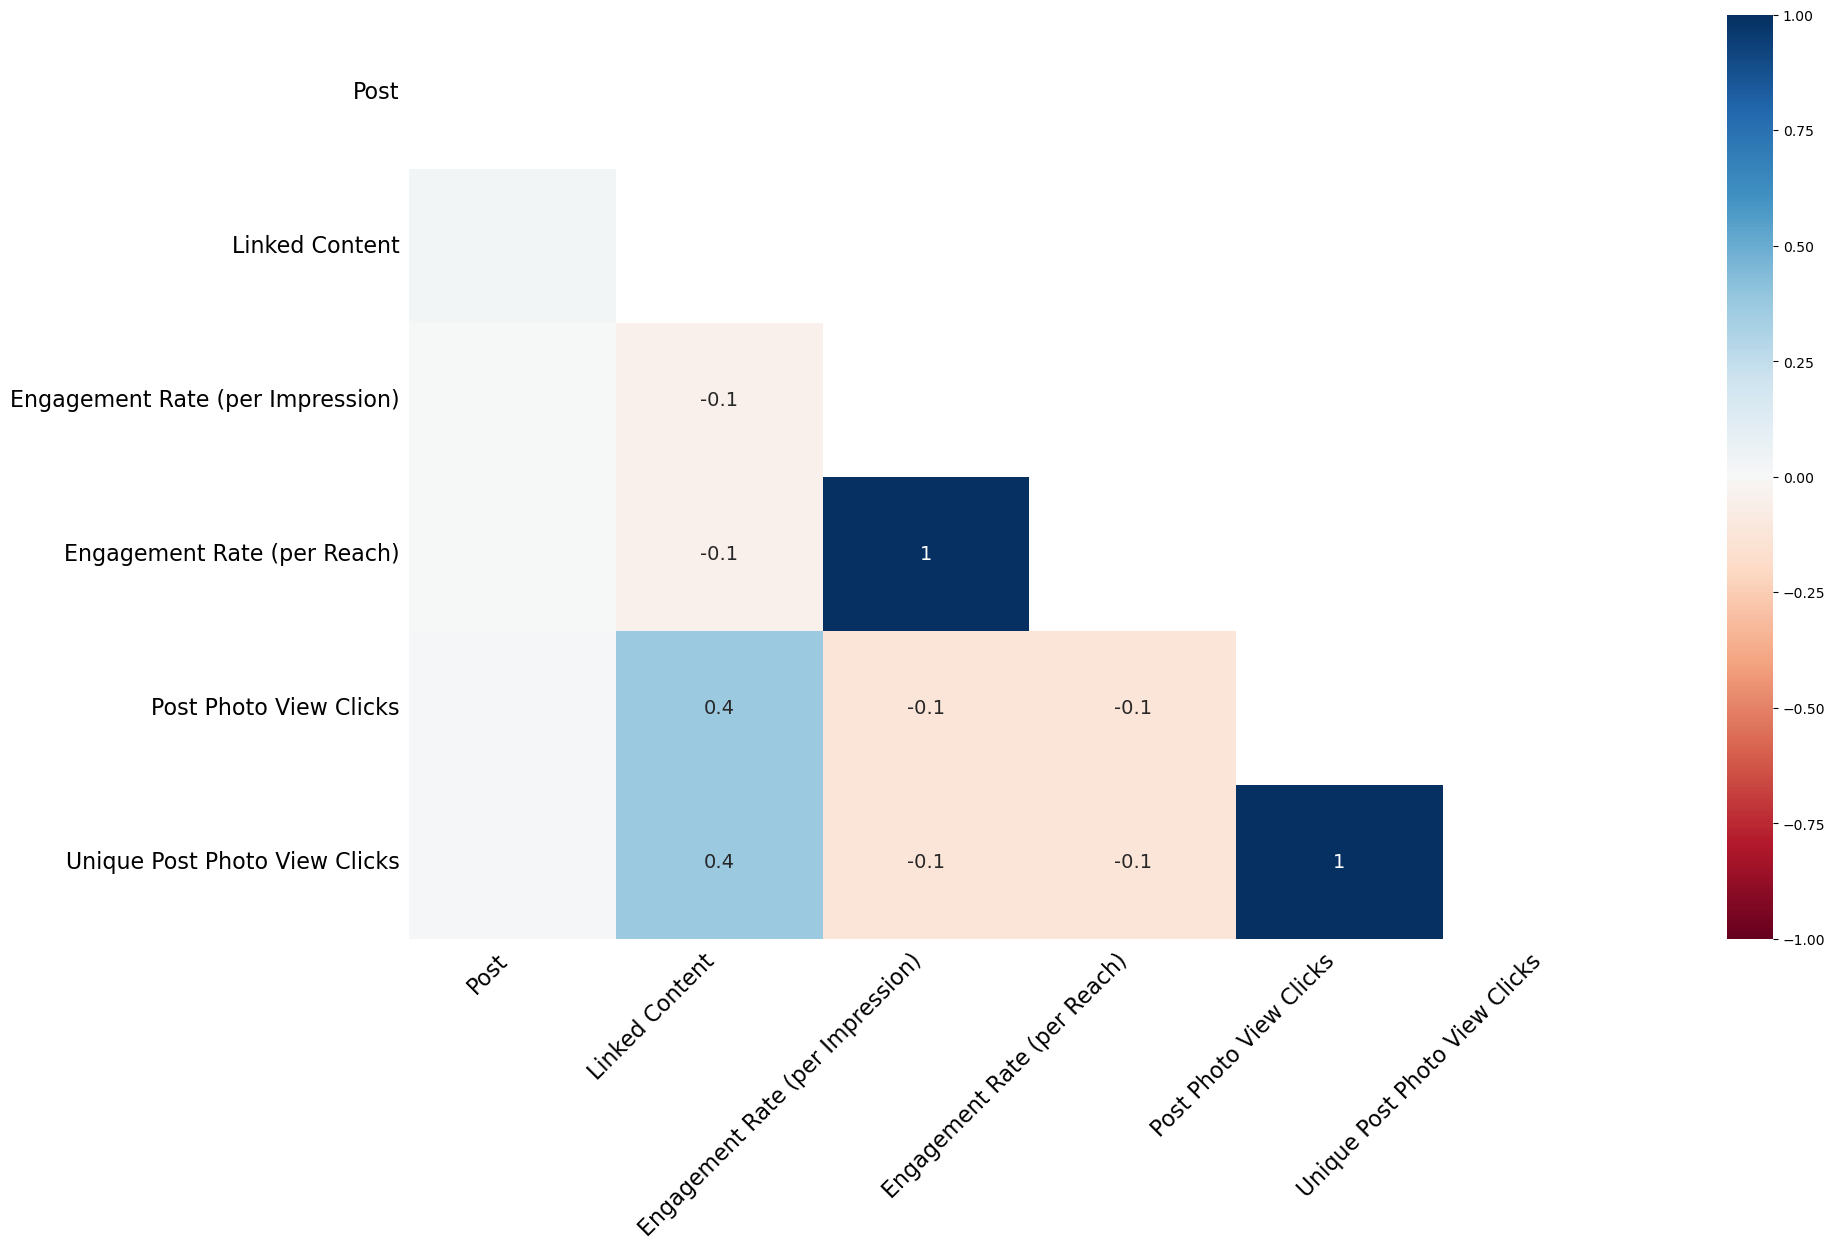

In [16]:
# Check missing data heatmap
msno.heatmap(df_not_null);

Engagement Rate (per Reach) and Engagement Rate (per Impression) have missing values in the same rows (i.e not missing at random). 

Post Photo View Clicks and Unique Post Photo View Clicks also have missing values in the same rows. 

In [17]:
# Check Engagements, Impressions, and Reach where Engagement Rate (per Reach) where null.   
(df_not_null[df_not_null['Engagement Rate (per Impression)'].isna()]
[['Engagements', 'Impressions', 'Reach', 'Engagement Rate (per Impression)', 'Engagement Rate (per Reach)']])

,Engagements,Impressions,Reach,Engagement Rate (per Impression),Engagement Rate (per Reach)
7711,8,0,0,NaN,NaN
7712,6,0,0,NaN,NaN
7713,13,0,0,NaN,NaN
7717,1,0,0,NaN,NaN
7718,7,0,0,NaN,NaN
...,...,...,...,...,...
8886,56,0,0,NaN,NaN
8887,333,0,0,NaN,NaN
8890,24,0,0,NaN,NaN
8891,138,0,0,NaN,NaN


##### Note

Missing values in Engagement Rate (per Impression) and Engagement Rate (per Reach) correspond to 0 Impressions or Reach

These values will be imputed with 0

In [18]:
# Impute 0 for missing values in 'Engagement Rate (per Impression)' and 'Engagement Rate (per Reach)' columns
df_not_null['Engagement Rate (per Impression)'] = df_not_null['Engagement Rate (per Impression)'].fillna(0)
df_not_null['Engagement Rate (per Reach)'] = df_not_null['Engagement Rate (per Reach)'].fillna(0)

In [19]:
# Confirm imputation
df_not_null[['Engagement Rate (per Impression)', 'Engagement Rate (per Reach)']].isna().sum()

Engagement Rate (per Impression)    0
Engagement Rate (per Reach)         0
dtype: int64

---

In [20]:
# Check content type where 'Post Photo View Clicks' are null
(df_not_null[df_not_null['Post Photo View Clicks'].isna()])['Content Type'].value_counts()

Video    906
Text     237
Link      69
Name: Content Type, dtype: int64

In [21]:
# Check content type where 'Unique Post Photo View Clicks' are null
(df_not_null[df_not_null['Unique Post Photo View Clicks'].isna()])['Content Type'].value_counts()

Video    906
Text     237
Link      69
Name: Content Type, dtype: int64

##### Note

Missing 'Post Photo View Clicks' & 'Unique Post Photo View Clicks' correspond to posts without photos.

These values will be imputed with 0. 

In [22]:
# Impute missing values in 'Post Photo View Clicks' and 'Unique Post Photo View Clicks' columns with 0
df_not_null['Post Photo View Clicks'] = df_not_null['Post Photo View Clicks'].fillna(0)
df_not_null['Unique Post Photo View Clicks'] = df_not_null['Unique Post Photo View Clicks'].fillna(0)

In [23]:
# Confirm imputation
df_not_null[['Post Photo View Clicks', 'Unique Post Photo View Clicks']].isna().sum()

Post Photo View Clicks           0
Unique Post Photo View Clicks    0
dtype: int64

---

In [24]:
# Examine missing posts
df_not_null[df_not_null['Post'].isna()][['Post', 'Link', 'Content Type']]

,Post,Link,Content Type
41,NaN,https://www.facebook.com/StanbicIBTC/photos/a.641783292616316/5567266376734625/?type=3,Photo
42,NaN,https://www.facebook.com/StanbicIBTC/photos/a.641783292616316/5567266523401277/?type=3,Photo
96,NaN,https://www.facebook.com/StanbicIBTC/photos/a.641783292616316/5226750117452921/?type=3,Photo
97,NaN,https://www.facebook.com/StanbicIBTC/photos/a.641783292616316/5226750354119564/?type=3,Photo
98,NaN,https://www.facebook.com/253788558082460/posts/5085836841544250/,Photo
...,...,...,...
8775,NaN,https://facebook.com/253788558082460_757969500997694,Photo
8796,NaN,https://facebook.com/253788558082460_754093498051961,Photo
8852,NaN,https://facebook.com/253788558082460_740822946045683,Photo
8864,NaN,https://facebook.com/253788558082460_736614566466521,Photo


In [25]:
# Examine content type of missing posts
df_not_null[df_not_null['Post'].isna()][['Content Type']].value_counts()

Content Type
Photo           118
Link             15
Video            11
Text              6
dtype: int64

##### Note

Posts with missing values do not have text content

They are mostly media content (especially photos)

In the rare case, text events (6). 

These values will be imputed with blank space instead.

In [26]:
# fill missing values in 'Post' column with values in ''
df_not_null['Post'] = df_not_null['Post'].fillna('')

In [27]:
# Confirm imputation
df_not_null['Post'].isna().sum()

0

----

##### Additional columns to be dropped

In [28]:
# Find columns where all values are 0
zero_columns = list(df_not_null.columns[df_not_null.isin([0]).all()])

In [29]:
zero_columns

['Paid Impressions',
 'Fan Paid Impressions',
 'Non-fan Paid Impressions',
 'Paid Reach',
 'Fan Paid Reach']

In [30]:
print(df_not_null['Network'].value_counts(), '\n')
print(df_not_null['Post Type'].value_counts(), '\n')
print(df_not_null['Profile'].value_counts(), '\n')

Facebook    8893
Name: Network, dtype: int64 

Post    8893
Name: Post Type, dtype: int64 

Stanbic IBTC    8893
Name: Profile, dtype: int64 



* **'Post ID'**: There is no reason to track individual posts in this analysis.
* **Network, 'Post Type', 'Profile**: Redundant Information
* **Link, 'Linked Content'**: The actual links to tweets are not needed for analysis
* **'Paid Impressions', 'Fan Paid Impressions', 'Non-fan Paid Impressions', 'Paid Reach','Fan Paid Reach'**: All values are 0

In [31]:
# Drop additional columns 
cols = ['Post ID', 'Network', 'Post Type', 'Profile','Link', 'Linked Content','Paid Impressions',
'Fan Paid Impressions', 'Non-fan Paid Impressions', 'Paid Reach','Fan Paid Reach']

df_not_null = df_not_null.drop(cols, axis=1)

In [32]:
# Check missing values
pd.DataFrame(df_not_null.isna().sum()).sort_values(by=0, ascending=False)

,0
Date,0
Negative Feedback,0
Sad Reactions,0
Angry Reactions,0
Comments,0
Shares,0
Click-Through Rate,0
Other Post Clicks,0
Post Clicks (All),0
Post Photo View Clicks,0


---
#### Fix issues with 'Engagement Rate (per impression)', 'Engagement Rate (per Reach)' & 'Click-Through Rate'

In [33]:
# Remove % sign from 'Engagement Rate (per Impression)', 'Engagement Rate (per Reach)' & 'Click-Through Rate' columns
df_not_null['Engagement Rate (per Impression)'] = df_not_null['Engagement Rate (per Impression)'].str.replace('%', '')
df_not_null['Engagement Rate (per Reach)'] = df_not_null['Engagement Rate (per Reach)'].str.replace('%', '')
df_not_null['Click-Through Rate'] = df_not_null['Click-Through Rate'].str.replace('%', '')

In [34]:
# Confirm changes
df_not_null[['Engagement Rate (per Impression)', 'Engagement Rate (per Reach)', 'Click-Through Rate']].tail()

,Engagement Rate (per Impression),Engagement Rate (per Reach),Click-Through Rate
8888,0,0,0
8889,0,0,0
8890,NaN,NaN,0
8891,NaN,NaN,0
8892,NaN,NaN,0


---

### Fix issues with wrong data types

In [35]:
# Convert "Date" column to datetime
df_not_null['Date'] = pd.to_datetime(df_not_null['Date'])

In [36]:
# List of columns to convert to numeric
numeric_columns =  ['Impressions', 'Organic Impressions', 'Viral Impressions', 'Non-viral Impressions',
        'Fan Impressions', 'Fan Organic Impressions', 'Non-fan Impressions','Non-fan Organic Impressions',
        'Reach', 'Organic Reach', 'Viral Reach', 'Non-viral Reach', 'Fan Reach', 'Engagement Rate (per Impression)',
        'Engagement Rate (per Reach)', 'Engagements', 'Reactions', 'Likes', 'Comments', 'Click-Through Rate',
        'Other Post Clicks', 'Post Clicks (All)', 'Post Photo View Clicks', 'Engaged Users', 'Engaged Fans',
        'Users Talking About This', 'Unique Reactions', 'Unique Post Clicks',
        'Unique Post Photo View Clicks', 'Unique Other Post Clicks',
       ]

In [37]:
# Convert columns to numeric data type
df_not_null[numeric_columns] = df_not_null[numeric_columns].applymap(lambda x: float(str(x).replace(',', '')))

In [38]:
# Convert 'Sent by' and 'Content type' columns to categorical data type
df_not_null['Sent by'] = df_not_null['Sent by'].astype('category')
df_not_null['Content Type'] = df_not_null['Content Type'].astype('category')

In [39]:
# Examine datatypes
pd.DataFrame(df_not_null.dtypes)

,0
Date,datetime64[ns]
Content Type,category
Sent by,category
Post,object
Impressions,float64
Organic Impressions,float64
Viral Impressions,float64
Non-viral Impressions,float64
Fan Impressions,float64
Fan Organic Impressions,float64


---

#### Fix issues with 'Sent by' blank spaces

In [40]:
pd.DataFrame(df_not_null['Sent by'].value_counts())

,Sent by
,6252
Damilare Oyekanmi,1650
Aramide Salami,371
Blessing Ubah,323
Sophia Amuka,209
Kemi Amoo,48
Dunni Ogunsanya,40


In [41]:
# Replace blank space with 'Other' in 'Sent by' column
df_not_null['Sent by'] = df_not_null['Sent by'].replace(' ', 'Other')

In [42]:
# Confirm changes
pd.DataFrame(df_not_null['Sent by'].value_counts())

,Sent by
Other,6252
Damilare Oyekanmi,1650
Aramide Salami,371
Blessing Ubah,323
Sophia Amuka,209
Kemi Amoo,48
Dunni Ogunsanya,40


---

In [43]:
# Posts with ads 
df_not_null[(df_not_null['Impressions'] != df_not_null['Organic Impressions'])
            ][['Impressions', 'Organic Impressions']]

,Impressions,Organic Impressions
12,95300.0,59484.0
15,70855.0,70787.0
18,82932.0,55147.0
80,46666.0,31946.0
85,36055.0,36071.0
...,...,...
7518,1155.0,1086.0
7555,911.0,898.0
7556,911.0,898.0
7595,939.0,909.0
